# MACHINE LEARNING - MULTI-CLASS CLASSIFICATION MODEL PROJECT

## Author(s): Nfayem Imoro

## `Business Understanding`

Train a machine learning model to predict the `product category` based on the other features.

## `Data Understanding`

### Importation of all necessary packages

In [2]:
# Import necessary libraries
import calendar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Set display options for pandas
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

# Suppress warnings
warnings.filterwarnings("ignore")

### Read Data

In [43]:
# Load the dataset into a DataFrame
dotr_df = pd.read_csv("dollar_tree-231012-200322.csv")

# Display the memory usage information of the DataFrame
print()
dotr_df.info(memory_usage="deep")
print()

# Display the first few rows of the DataFrame
dotr_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memo

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


## Perform a `brief` EDA  (info(), describe(), corr() etc)

In [44]:
# Generate descriptive statistics of the DataFrame 
dotr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,34867.0,17433.000000,10065.380254,0.000000,8716.500000,17433.0,26149.50,34866.0
Year,34866.0,2015.569237,0.495190,2015.000000,2015.000000,2016.0,2016.00,2016.0
Customer Age,34866.0,36.382895,11.112902,17.000000,28.000000,35.0,44.00,87.0
Quantity,34866.0,2.002524,0.813936,1.000000,1.000000,2.0,3.00,3.0
Unit Cost,34866.0,349.880567,490.015846,0.670000,45.000000,150.0,455.00,3240.0
Unit Price,34866.0,389.232485,525.319091,0.666667,53.666667,179.0,521.00,5082.0
Cost,34866.0,576.004532,690.500395,2.000000,85.000000,261.0,769.00,3600.0
Revenue,34867.0,640.870093,736.640033,2.000000,102.000000,319.0,902.00,5082.0
Column1,2574.0,688.054913,774.200897,2.000000,104.250000,390.5,975.75,3681.0


In [45]:
# Generate descriptive statistics for categorical columns in the DataFrame 
dotr_df.describe(include="object").T

,count,unique,top,freq
Date,34866,576,3/1/2016,196
Month,34866,12,June,3680
Customer Gender,34866,2,M,17805
Country,34866,4,United States,18076
State,34866,45,California,10332
Product Category,34866,3,Accessories,22534
Sub Category,34866,17,Tires and Tubes,11112


In [46]:
# Retrieve the unique values present in the "Product Category" column of the DataFrame
dotr_df["Product Category"].unique()

array(['Accessories', 'Clothing', 'Bikes', nan], dtype=object)

#### Missing and Duplicated Values

In [47]:
# Check for total missing values in each column of the DataFrame
missing_values = dotr_df.isnull().sum()
print()
print("Missing values in each column:")
print()
print(missing_values)
print()

# Check for total duplicated rows in the DataFrame
duplicate_count = dotr_df.duplicated().sum()
print("Number of duplicated rows:", duplicate_count)
print()

# Select rows where values in "Column1" are not null and display the first few rows
dotr_df[~dotr_df["Column1"].isnull()].head()


Missing values in each column:

index                   0
Date                    1
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Column1             32293
dtype: int64

Number of duplicated rows: 0



,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
312,312,1/11/2016,2016.0,January,40.0,M,France,Yveline,Bikes,Road Bikes,3.0,567.0,790.0,1701.0,2370.0,2370.0
313,313,1/11/2016,2016.0,January,40.0,M,France,Yveline,Accessories,Helmets,2.0,192.5,199.0,385.0,398.0,398.0
314,314,1/18/2016,2016.0,January,40.0,M,France,Yveline,Bikes,Mountain Bikes,2.0,1160.0,1511.5,2320.0,3023.0,3023.0
315,315,1/18/2016,2016.0,January,40.0,M,France,Yveline,Accessories,Bottles and Cages,2.0,115.0,147.0,230.0,294.0,294.0
316,316,1/18/2016,2016.0,January,40.0,M,France,Yveline,Accessories,Bottles and Cages,1.0,140.0,167.0,140.0,167.0,167.0


In [48]:
# Count the number of missing values in each row of the DataFrame
missing_values_per_row = dotr_df.isnull().sum(axis=1)

# Print the results
print()
print("Number of missing values per row:")
print()
print(missing_values_per_row)
print()

# Select rows where the count of missing values is greater than 1
dotr_df[dotr_df.isnull().sum(axis=1) > 1]


Number of missing values per row:

0         1
1         1
2         1
3         1
4         1
         ..
34862     1
34863     1
34864     1
34865     1
34866    14
Length: 34867, dtype: int64



,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
34866,34866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,641.532095,NaN


### Univariate and Bivariate Plots

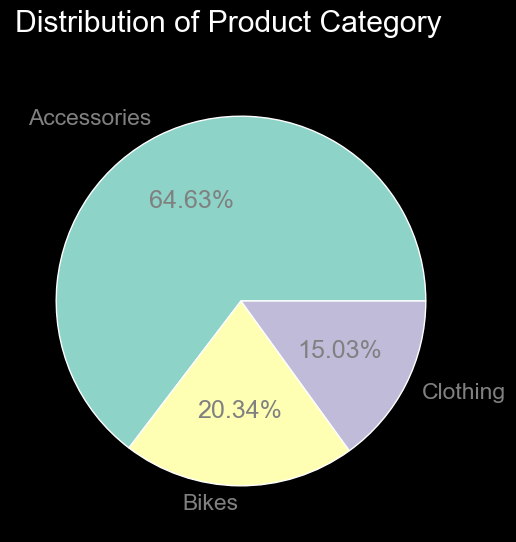

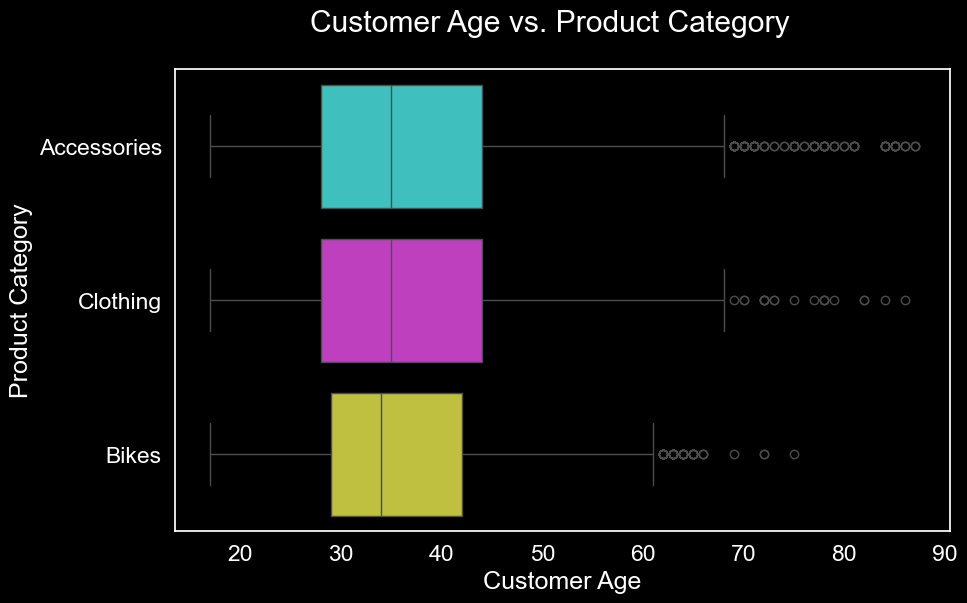

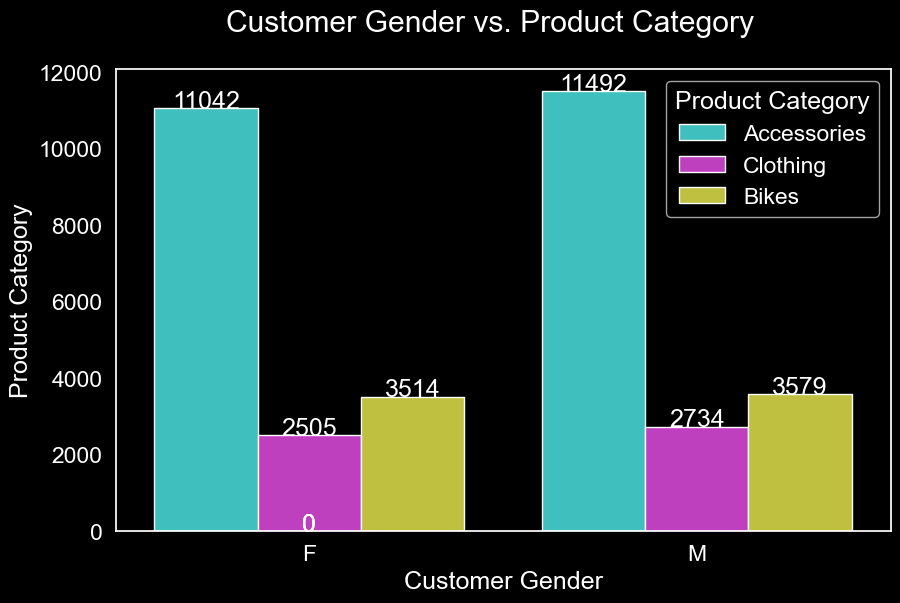

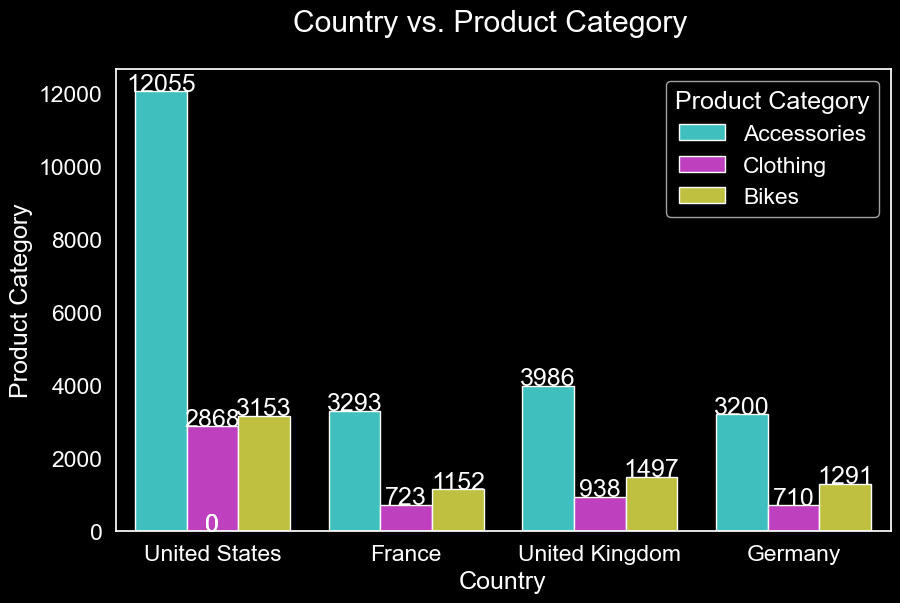

In [10]:
# set theme
sns.set_theme(style="dark", palette="dark", font="sans-serif", font_scale=1.5)
plt.style.use("dark_background")
custom_palette = ["cyan", "magenta", "yellow"]

# Univariate pieplot for Product Category
pcategory_counts = dotr_df["Product Category"].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(pcategory_counts, labels=pcategory_counts.index, autopct="%1.2f%%", textprops={"color": "grey"})
plt.suptitle("Distribution of Product Category")
print()
plt.show()
print()

# Bivariate boxplot for Customer Age
plt.figure(figsize=(10, 6))
sns.boxplot(x="Customer Age", y="Product Category", data=dotr_df, palette=custom_palette, saturation=0.5)
plt.suptitle("Customer Age vs. Product Category")
plt.xlabel("Customer Age")
plt.ylabel("Product Category")
plt.show()
print()

# Bivariate barplot for Customer Gender
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=dotr_df, x="Customer Gender", hue="Product Category", palette=custom_palette, saturation=0.5)
plt.xlabel("Customer Gender")
plt.ylabel("Product Category")
plt.suptitle("Customer Gender vs. Product Category")
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center",
                xytext=(0, 5),
                textcoords="offset points")
plt.show()
print()

# Bivariate barplot for Country
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=dotr_df, x="Country", hue="Product Category", palette=custom_palette, saturation=0.5)
plt.xlabel("Country")
plt.ylabel("Product Category")
plt.suptitle("Country vs. Product Category")
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center",
                xytext=(0, 5),
                textcoords="offset points")
plt.show()
print()

## `Data Preparation`

### Data Cleaning

In [49]:
# Remove the specified columns ("Column1" and "index")
dotr_df.drop(["Column1", "index"], axis=1, inplace=True)

# Display the first few rows of the DataFrame after dropping the specified columns
dotr_df.head()

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0


In [50]:
# Remove the row with index 34866 from the DataFrame
dotr_df.drop(34866, inplace=True)

# Display the last few rows of the DataFrame after the row removal
dotr_df.tail()

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
34861,3/22/2015,2015.0,March,38.0,M,France,Charente-Maritime,Bikes,Mountain Bikes,1.0,2049.0,1487.000000,2049.0,1487.0
34862,2/7/2016,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.0,985.500000,2320.0,1971.0
34863,3/13/2015,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.0,1583.000000,2049.0,1583.0
34864,4/5/2015,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.0,560.666667,2049.0,1682.0
34865,8/30/2015,2015.0,August,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2320.0,1568.000000,2320.0,1568.0


In [51]:
# Convert 'Date' column to datetime format with specified format
dotr_df["Date"] = pd.to_datetime(dotr_df["Date"], format="%m/%d/%Y")

# Convert selected columns to integer data type
dotr_df[["Year", "Customer Age", "Quantity"]] = dotr_df[["Year", "Customer Age", "Quantity"]].apply(pd.to_numeric, errors='coerce').astype(int)

# Calculate 'Cost' column by multiplying 'Quantity' and 'Unit Cost'
dotr_df["Cost"] = dotr_df["Quantity"] * dotr_df["Unit Cost"]

# Calculate 'Revenue' column by multiplying 'Quantity' and 'Unit Price'
dotr_df["Revenue"] = dotr_df["Quantity"] * dotr_df["Unit Price"]

# Display information about the DataFrame with memory usage
print()
print("DataFrame Info with Memory Usage:")
print()
print(dotr_df.info(memory_usage="deep"))
print()

# Display the shape of the DataFrame
print("DataFrame Shape:", dotr_df.shape)
print()

# Display the first few rows of the DataFrame
dotr_df.head()


DataFrame Info with Memory Usage:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34866 entries, 0 to 34865
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              34866 non-null  datetime64[ns]
 1   Year              34866 non-null  int32         
 2   Month             34866 non-null  object        
 3   Customer Age      34866 non-null  int32         
 4   Customer Gender   34866 non-null  object        
 5   Country           34866 non-null  object        
 6   State             34866 non-null  object        
 7   Product Category  34866 non-null  object        
 8   Sub Category      34866 non-null  object        
 9   Quantity          34866 non-null  int32         
 10  Unit Cost         34866 non-null  float64       
 11  Unit Price        34866 non-null  float64       
 12  Cost              34866 non-null  float64       
 13  Revenue           34866 non-null  float6

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,2016-02-19,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,1,80.00,109.000000,80.00,109.000000
1,2016-02-20,2016,February,29,F,United States,Washington,Clothing,Gloves,2,24.50,28.500000,49.00,57.000000
2,2016-02-27,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,3,3.67,5.000000,11.01,15.000000
3,2016-03-12,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,2,87.50,116.500000,175.00,233.000000
4,2016-03-12,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,3,35.00,41.666667,105.00,125.000001


### Time Series Analysis

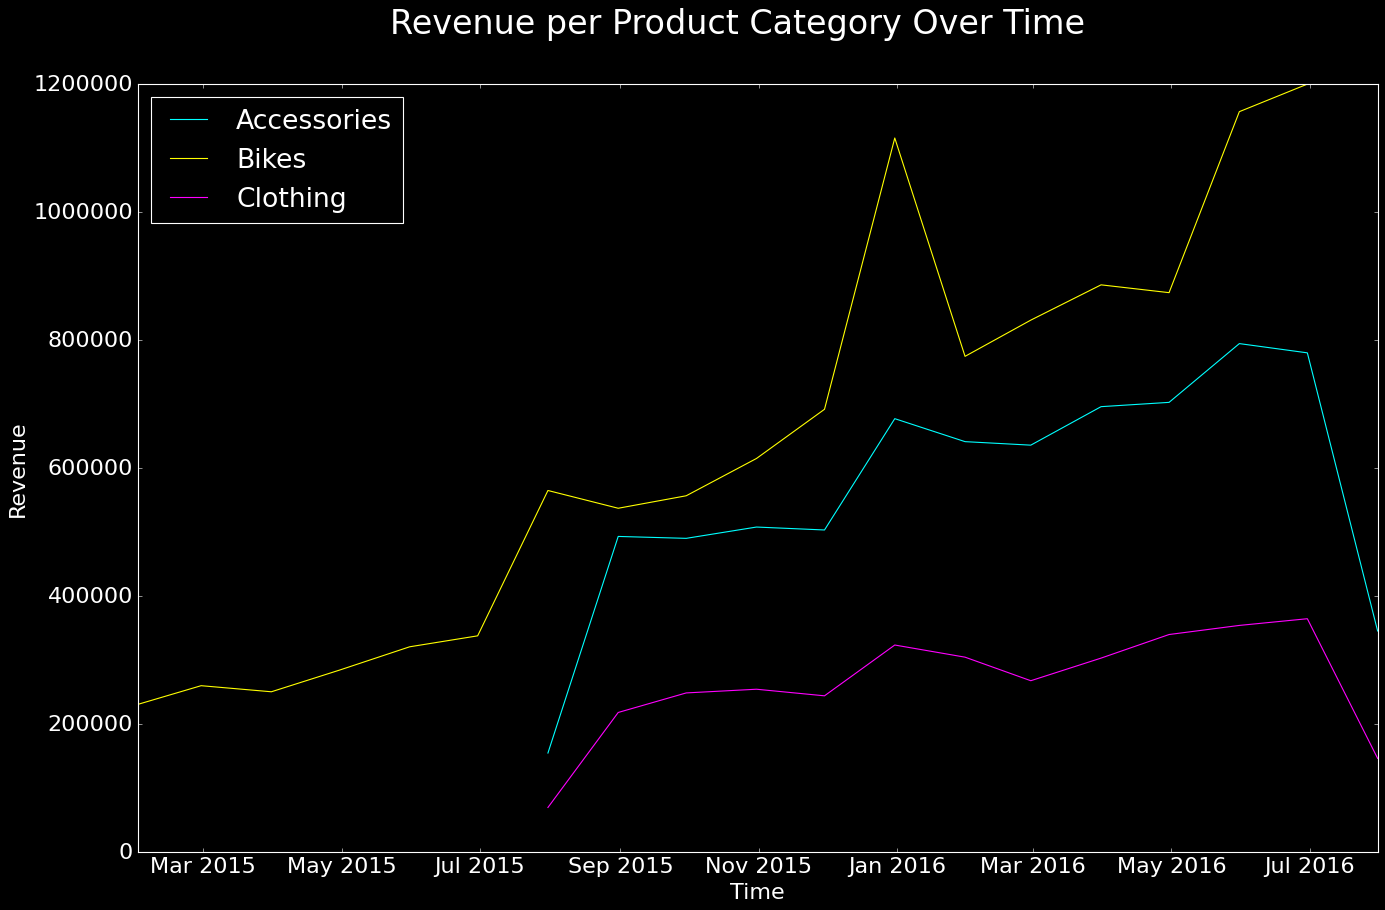

In [15]:
# set theme
plt.style.use("dark_background")
plt.rcParams.update({'font.size': 20})
custom_palette = ["cyan", "magenta", "yellow"]

# Filter data for each product category and resample on monthly basis
revenue_trend_ac = dotr_df[dotr_df["Product Category"] == "Accessories"]
revenue_trend_bk = dotr_df[dotr_df["Product Category"] == "Bikes"]
revenue_trend_cl = dotr_df[dotr_df["Product Category"] == "Clothing"]
revenue_trend_ac = revenue_trend_ac.resample("ME", on="Date").sum()
revenue_trend_bk = revenue_trend_bk.resample("ME", on="Date").sum()
revenue_trend_cl = revenue_trend_cl.resample("ME", on="Date").sum()

# Plotting the Time Series Analysis for Revenue per each product category
plt.figure(figsize=(20, 12))
line1, = plt.plot(revenue_trend_ac.index, revenue_trend_ac["Revenue"], color="cyan", label="Accessories")
line2, = plt.plot(revenue_trend_bk.index, revenue_trend_bk["Revenue"], color="yellow", label="Bikes")
line3, = plt.plot(revenue_trend_cl.index, revenue_trend_cl["Revenue"], color="magenta", label="Clothing")
plt.xlabel("Time")
plt.ylabel("Revenue")
plt.suptitle("Revenue per Product Category Over Time", fontsize=30)
plt.legend([line1, line2, line3], ["Accessories", "Bikes", "Clothing"], loc="upper left")
print()
plt.show()
print()

### Feature Selection

#### Univariate Feature Selection with Mutual Information Classification (UFS)

Univariate Feature Selection with Mutual Information Classification (UFS) is a straightforward method for selecting features based on their individual relevance to the target variable. Its pros include simplicity and ease of implementation, as well as the ability to capture the relationship between each feature and the target variable independently, providing insights into feature importance. Moreover, UFS is effective in selecting features with a strong mutual information score with the target variable, indicating their predictive power. 

However, UFS has some limitations. It ignores feature interactions, meaning it may overlook important combined effects of features on the target variable. Additionally, it may select redundant features if they individually have high mutual information scores but do not contribute significantly when combined with other features. Overall, while UFS is a useful feature selection technique, it's important to consider its limitations and complement it with other methods to ensure a comprehensive feature selection process. 

In [52]:
# Make a copy of the original DataFrame
ufsdotr_df = dotr_df.copy()

# Map month names to their equivalent numbers from 1 to 12
month_map = {month: index for index, month in enumerate(calendar.month_name) if month}

# Apply the mapping to the 'Month' column
ufsdotr_df["Month"] = ufsdotr_df["Month"].map(month_map)

# Encode "Product Category" by mapping
ufsdotr_df["Product Category"] = ufsdotr_df["Product Category"].map({"Accessories": 0, "Bikes": 1, "Clothing": 2})

# Perform one-hot encoding for all other categorical columns
ufsdotr_df = pd.get_dummies(ufsdotr_df, columns=ufsdotr_df.select_dtypes(include=["object"]).columns, drop_first=True)

# Separate the target variable from the independent variables
X = ufsdotr_df.drop(columns=["Product Category", "Date"])
y = ufsdotr_df["Product Category"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Univariate Feature Selection with Mutual Information
mutual_info_scores = mutual_info_classif(X_train, y_train)

# Create a dictionary to store feature scores
feature_scores = dict(zip(X.columns, mutual_info_scores))

# Convert feature_scores dictionary to a DataFrame
feature_scores_df = pd.DataFrame(list(feature_scores.items()), columns=["Feature_Prefix", "Mutual_Information_Score"])
feature_scores_df["Feature"] = feature_scores_df["Feature_Prefix"].str.split("_").str[0]

# # Group by Prefix and calculate mean Mutual_Information_Score
grouped_scores = feature_scores_df.groupby("Feature")["Mutual_Information_Score"].mean().sort_values(ascending=False)

# Find the value of the 50th percentile
percentile_50th = grouped_scores.quantile(0.5)

# Filter out scores below the 50th percentile
filtered_grouped_scores = grouped_scores[grouped_scores >= percentile_50th]

# Display the filtered scores
print()
print("Selected Features from Univariate Feature Selection:")
print()
print(filtered_grouped_scores)
print()


Selected Features from Univariate Feature Selection:

Feature
Cost            0.711423
Unit Cost       0.644229
Revenue         0.305014
Unit Price      0.235144
Sub Category    0.062945
Customer Age    0.010920
Name: Mutual_Information_Score, dtype: float64



#### Feature Importance from Random Forest (FRF)

Feature Importance from Random Forest (FRF) offers several advantages in feature selection. It effectively captures both the individual and collective importance of features by assessing their contribution to the model's performance. Moreover, FRF considers feature interactions implicitly, as Random Forest inherently incorporates interactions among features during its training process. Additionally, FRF is robust to overfitting when using a sufficiently large number of trees in the Random Forest, making it a reliable method for selecting features.

However, FRF has its drawbacks. It is prone to overfitting, especially if the model is too complex or if there is high multicollinearity among features. Furthermore, FRF may prioritize features that are informative for the training data but generalize poorly to unseen data, leading to reduced model performance on new datasets. Therefore, while FRF is a powerful feature selection technique, it's essential to carefully tune the model parameters and assess its performance on validation datasets to mitigate the risk of overfitting and ensure generalizability.

In [53]:
# Make a copy of the original DataFrame
frfdotr_df = dotr_df.copy()

# Map month names to their equivalent numbers from 1 to 12
month_map = {month: index for index, month in enumerate(calendar.month_name) if month}

# Apply the mapping to the 'Month' column
frfdotr_df["Month"] = frfdotr_df["Month"].map(month_map)

# Encode "Product Category" by mapping
frfdotr_df["Product Category"] = frfdotr_df["Product Category"].map({"Accessories": 0, "Bikes": 1, "Clothing": 2})

# Perform one-hot encoding for all other categorical columns
frfdotr_df = pd.get_dummies(frfdotr_df, columns=frfdotr_df.select_dtypes(include=["object"]).columns, drop_first=True)

# Separate the target variable from the independent variables
X = frfdotr_df.drop(columns=["Product Category", "Date"])
y = frfdotr_df["Product Category"]

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame of feature importances
feature_importance_df = pd.DataFrame({"Feature_Prefix": X.columns, "Importance": feature_importances})
feature_importance_df["Feature"] = feature_importance_df["Feature_Prefix"].str.split("_").str[0]

# Group by Prefix and calculate mean Importance
grouped_importance = feature_importance_df.groupby("Feature")["Importance"].mean().sort_values(ascending=False)

# Find the value of the 50th percentile
percentile_50th = grouped_importance.quantile(0.5)

# Filter out importances below the 50th percentile
filtered_grouped_importances = grouped_importance[grouped_importance >= percentile_50th]

# Print or inspect the feature importances
print()
print("Selected Features from Random Forest:")
print()
print(filtered_grouped_importances)
print()


Selected Features from Random Forest:

Feature
Cost            0.113663
Unit Cost       0.083650
Revenue         0.076509
Unit Price      0.043510
Sub Category    0.041352
Customer Age    0.004311
Name: Importance, dtype: float64



#### Recursive Feature Elimination with Random Forest as the Estimator (RFE)

Recursive Feature Elimination with Random Forest as the Estimator (RFE) offers several advantages in feature selection. It iteratively selects features based on their importance, allowing for a more comprehensive assessment of feature relevance compared to other methods. Additionally, RFE provides insights into the optimal number of features required for modeling, which can be valuable for dimensionality reduction. Moreover, RFE tends to select features that collectively contribute to the model's performance, potentially reducing overfitting by focusing on the most informative features.

However, RFE has its limitations. It can be computationally intensive, especially with a large number of features, as it involves training multiple Random Forest models with different subsets of features. Additionally, RFE may still be susceptible to overfitting if the Random Forest estimator itself is overfitting to the training data. Therefore, while RFE is a powerful feature selection technique, it's essential to consider computational resources and carefully tune the Random Forest parameters to avoid overfitting and ensure reliable feature selection.

In [54]:
# Make a copy of the original DataFrame
rfedotr_df = dotr_df.copy()

# Map month names to their equivalent numbers from 1 to 12
month_map = {month: index for index, month in enumerate(calendar.month_name) if month}
rfedotr_df["Month"] = rfedotr_df["Month"].map(month_map)

# Encode "Product Category" by mapping
rfedotr_df["Product Category"] = rfedotr_df["Product Category"].map({"Accessories": 0, "Bikes": 1, "Clothing": 2})

# Perform one-hot encoding for all other categorical columns
rfedotr_df = pd.get_dummies(rfedotr_df, columns=rfedotr_df.select_dtypes(include=["object"]).columns, drop_first=True)

# Separate the target variable from the independent variables
X = rfedotr_df.drop(columns=["Product Category", "Date"])
y = rfedotr_df["Product Category"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the number of features to select (50% of the total number of features)
n_features_to_select = 20

# Initialize RFE with Random Forest as the estimator
rfe = RFE(estimator=rf_classifier, n_features_to_select=n_features_to_select)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Get the feature ranking
feature_ranking = rfe.ranking_[rfe.support_]

# Create a DataFrame for selected features and their rankings
selected_features_df = pd.DataFrame({
    "Feature_Prefix": selected_features,
    "Ranking": feature_ranking
})

# Split the prefix from the feature name
selected_features_df["Feature"] = selected_features_df["Feature_Prefix"].str.split("_").str[0]

# Group by feature and calculate mean ranking
grouped_rankings = selected_features_df.groupby("Feature")["Ranking"].mean()

# Print or inspect the selected features and their rankings
print()
print("Selected Features from Recursive Feature Elimination:")
print()
print(grouped_rankings)
print()


Selected Features from Recursive Feature Elimination:

Feature
Cost            1.0
Revenue         1.0
Sub Category    1.0
Unit Cost       1.0
Unit Price      1.0
Name: Ranking, dtype: float64



#### Decision Table

To incorporate a feature into the modeling process, it undergoes rigorous evaluation against predefined criteria. A feature must meet the criteria outlined in the decision table across two or more parameters to be considered for inclusion in the model. The parameters include:
1. Univariate Feature Selection with Mutual Information Classification (UFS)
2. Feature Importance from Random Forest (FRF)
3. Recursive Feature Elimination with Random Forest as the Estimator (RFE)

![Alt_Text](dtbl_igp.png)

In [46]:
# Data for decision table
data = {
    "FEATURES": ["Date", "Year", "Month", "Customer Age", "Country", "State", "Customer Gender", "Sub Category", "Quantity", "Unit Cost", "Unit Price", "Cost", "Revenue"],
    
    "UFS": ["", "", "", "Yes", "", "", "", "Yes", "", "Yes", "Yes", "Yes", "Yes"],
    
    "FRF": ["", "", "", "Yes", "", "", "", "Yes", "", "Yes", "Yes", "Yes", "Yes"],
    
    "RFE": ["", "", "", "", "", "", "", "Yes", "", "Yes", "Yes", "Yes", "Yes"],
    
    "TOTAL": ["0", "0", "0", "2", "0", "0", "0", "3", "0", "3", "3", "3", "3"]
}

# Create the DataFrame
dt_df = pd.DataFrame(data)

# Display the DataFrame
print()
dt_df

,FEATURES,UFS,FRF,RFE,TOTAL
0,Date,,,,0
1,Year,,,,0
2,Month,,,,0
3,Customer Age,Yes,Yes,,2
4,Country,,,,0
5,State,,,,0
6,Customer Gender,,,,0
7,Sub Category,Yes,Yes,Yes,3
8,Quantity,,,,0
9,Unit Cost,Yes,Yes,Yes,3


## Divide data into input and output

In [55]:
# Selecting relevant columns for random forest classification
rfrdotr_df = dotr_df[["Customer Age", "Product Category", "Sub Category", "Unit Cost", "Cost", "Unit Price", "Revenue"]]

# Display the first few rows of the DataFrame
rfrdotr_df.head()

,Customer Age,Product Category,Sub Category,Unit Cost,Cost,Unit Price,Revenue
0,29,Accessories,Tires and Tubes,80.00,80.00,109.000000,109.000000
1,29,Clothing,Gloves,24.50,49.00,28.500000,57.000000
2,29,Accessories,Tires and Tubes,3.67,11.01,5.000000,15.000000
3,29,Accessories,Tires and Tubes,87.50,175.00,116.500000,233.000000
4,29,Accessories,Tires and Tubes,35.00,105.00,41.666667,125.000001


## Encoding

### 1. Encode the target column (the labels)


In [56]:
# Selecting the target variable
y = rfrdotr_df["Product Category"] 

# Initialize the LabelEncoder to encode categorical target variable
label_encoder = LabelEncoder()

# Fit and transform the categorical labels to numerical values
y = label_encoder.fit_transform(y)

# Display the encoded target series
y

array([0, 2, 0, ..., 1, 1, 1])

### 2. Encode categorical columns

In [57]:
# Perform dummy encoding (one-hot encoding)
dumdotr_df = pd.get_dummies(rfrdotr_df[["Sub Category"]], prefix=["Sub"],drop_first=True)

# Display the first few rows of the DataFrame
dumdotr_df.head()

,Sub_Bike Stands,Sub_Bottles and Cages,Sub_Caps,Sub_Cleaners,Sub_Fenders,Sub_Gloves,Sub_Helmets,Sub_Hydration Packs,Sub_Jerseys,Sub_Mountain Bikes,Sub_Road Bikes,Sub_Shorts,Sub_Socks,Sub_Tires and Tubes,Sub_Touring Bikes,Sub_Vests
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


### Replace original categorical columns with encoded ones
##### Don't forget Reset indices to ensure proper alignment when I concatenate


In [58]:
# Concatenate dummy variables with the original DataFrame to include one-hot encoded categorical features
endotr_df = pd.concat([rfrdotr_df, dumdotr_df], axis=1)

# Prepare the Features by dropping the target variable and the original categorical columns
X = endotr_df.drop(columns=["Product Category", "Sub Category"])

# Display the first few rows of the DataFrame after feature preparation
X.head()

,Customer Age,Unit Cost,Cost,Unit Price,Revenue,Sub_Bike Stands,Sub_Bottles and Cages,Sub_Caps,Sub_Cleaners,Sub_Fenders,Sub_Gloves,Sub_Helmets,Sub_Hydration Packs,Sub_Jerseys,Sub_Mountain Bikes,Sub_Road Bikes,Sub_Shorts,Sub_Socks,Sub_Tires and Tubes,Sub_Touring Bikes,Sub_Vests
0,29,80.00,80.00,109.000000,109.000000,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,29,24.50,49.00,28.500000,57.000000,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,29,3.67,11.01,5.000000,15.000000,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,29,87.50,175.00,116.500000,233.000000,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,29,35.00,105.00,41.666667,125.000001,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


## `Modeling`

In [59]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the random forest model
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [60]:
# Use cross-validation to predict the target variable on the training set
rfry_train_pred = cross_val_predict(forest_clf, X_train_scaled, y_train, cv=3)

# Compute the confusion matrix based on the predicted values and the actual target variable on the training set
rfrcf_matrix = confusion_matrix(y_train, rfry_train_pred)

# Display the confusion matrix
rfrcf_matrix

array([[18022,     2,     0],
       [    0,  5637,     0],
       [    0,     0,  4231]], dtype=int64)

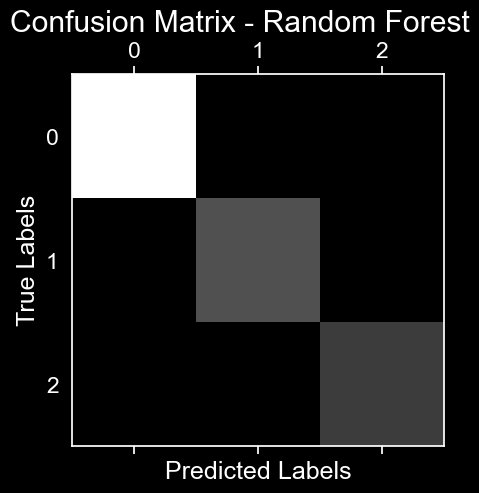

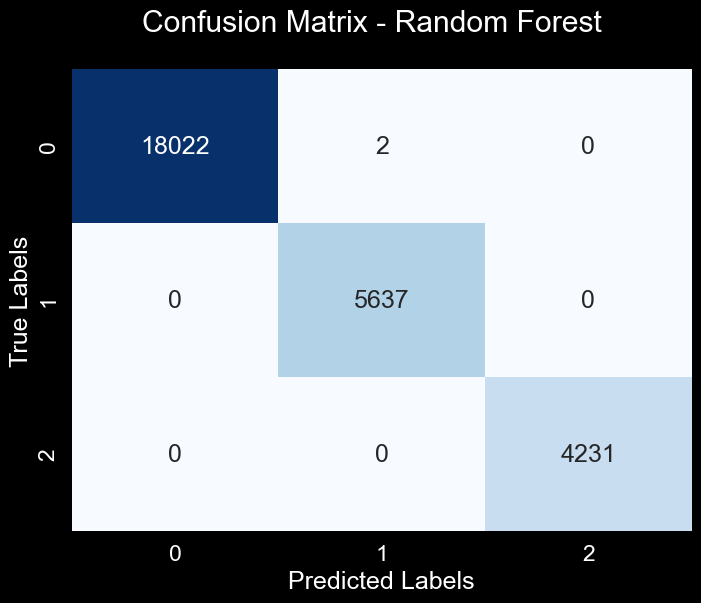



Random Forest Metrics:

              precision    recall  f1-score   support

 Accessories       1.00      1.00      1.00     18024
       Bikes       1.00      1.00      1.00      5637
    Clothing       1.00      1.00      1.00      4231

    accuracy                           1.00     27892
   macro avg       1.00      1.00      1.00     27892
weighted avg       1.00      1.00      1.00     27892

Accuracy: 0.9999282948515703



In [65]:
# Compute and visualize the confusion matrix for the random forest model
conf_matrix_rfr = confusion_matrix(y_train, rfry_train_pred)
plt.matshow(conf_matrix_rfr, cmap=plt.cm.gray)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.suptitle("Confusion Matrix - Random Forest", y=1)
print()
plt.show()
print()

# Another visualization of the confusion matrix using seaborn's heatmap
conf_matrix_forest = confusion_matrix(y_train, rfry_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_forest, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.suptitle("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
print()
plt.show()
print()

# Print classification report and additional metrics for random forest model
target_names = ["Accessories", "Bikes", "Clothing"]
print()
print("Random Forest Metrics:")
print()
print(classification_report(y_train, rfry_train_pred, target_names=target_names))
print("Accuracy:", accuracy_score(y_train, rfry_train_pred))
print()

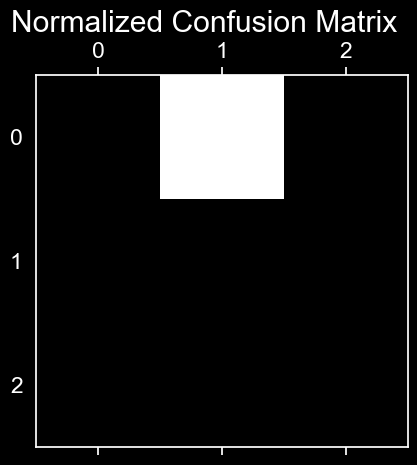

In [71]:
# Calculate the sum of each row in the confusion matrix.
row_sums = rfrcf_matrix.sum(axis=1, keepdims=True)

# Normalize the confusion matrix by dividing each element by the sum of its respective row.
norm_conf_mx = rfrcf_matrix / row_sums

# Fill the diagonal elements of the normalized confusion matrix with zeros.
# This removes the true positives from the visualization since we're interested in misclassifications.
np.fill_diagonal(norm_conf_mx, 0)

# Plot the normalized confusion matrix as a grayscale matrix.
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

# Add a title to the plot.
plt.suptitle("Normalized Confusion Matrix", y=1)

# Display the plot.
plt.show()

## `Evaluation`

### Plot the confusion Matrix using  `matplotlib` and or `seaborn`

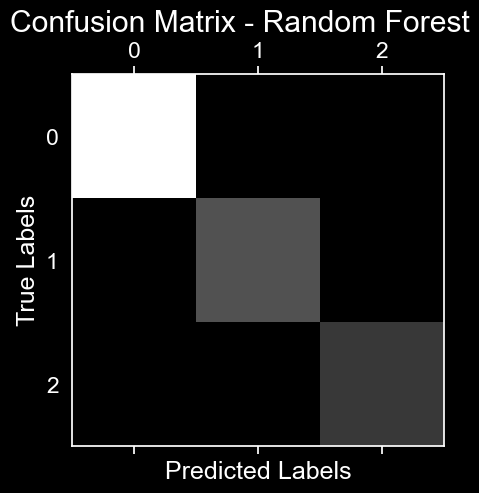

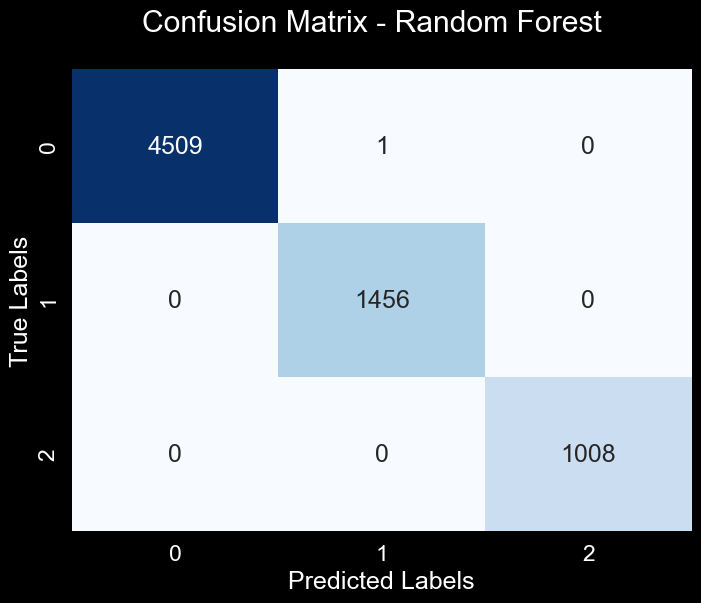

In [66]:
# Predict on Test Data with random forest Model
y_pred_forest = forest_clf.predict(X_test_scaled)

# Compute and visualize the confusion matrix for the random forest Model
conf_matrix_rfr = confusion_matrix(y_test, y_pred_forest)
plt.matshow(conf_matrix_rfr, cmap=plt.cm.gray)
plt.suptitle("Confusion Matrix - Random Forest", y=1)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
print()
plt.show()
print()

# Another visualization of the confusion matrix using seaborn's heatmap
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_forest, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.suptitle("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
print()
plt.show()
print()

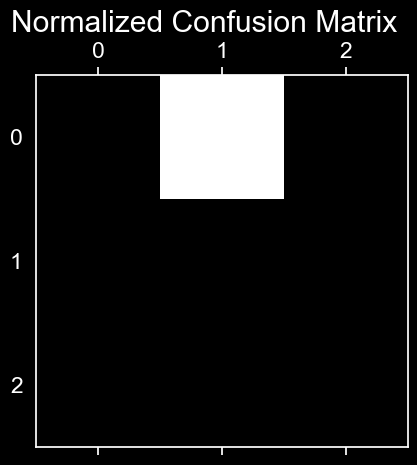

In [70]:
# Calculate the sum of each row in the confusion matrix.
row_sums = conf_matrix_rfr.sum(axis=1, keepdims=True)

# Normalize the confusion matrix by dividing each element by the sum of its respective row.
norm_conf_mx = conf_matrix_rfr / row_sums

# Fill the diagonal elements of the normalized confusion matrix with zeros.
# This removes the true positives from the visualization since we're interested in misclassifications.
np.fill_diagonal(norm_conf_mx, 0)

# Plot the normalized confusion matrix as a grayscale matrix.
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

# Add a title to the plot.
plt.suptitle("Normalized Confusion Matrix", y=1)

# Display the plot.
plt.show()

### Build a classification Report

In [67]:
# Define the target labels for better interpretation
target_names = ["Accessories", "Bikes", "Clothing"]

# Print a header for the random forest metrics
print()
print("Random Forest Metrics:")
print()

# Print the classification report including precision, recall, F1-score, and support for each class
print(classification_report(y_test, y_pred_forest, target_names=target_names))

# Print the accuracy score, which measures the proportion of correctly predicted instances
print("Accuracy:", accuracy_score(y_test, y_pred_forest))

print()


Random Forest Metrics:

              precision    recall  f1-score   support

 Accessories       1.00      1.00      1.00      4510
       Bikes       1.00      1.00      1.00      1456
    Clothing       1.00      1.00      1.00      1008

    accuracy                           1.00      6974
   macro avg       1.00      1.00      1.00      6974
weighted avg       1.00      1.00      1.00      6974

Accuracy: 0.9998566102667049



## Conclusion

The classification report reveals exceptional performance by the Random Forest classifier on the dataset, boasting perfect precision, recall, and F1-scores across all classes, coupled with a remarkably high accuracy score nearing 100%. The weighted average which is a suitable metric of accuracy for the imbalanced dataset of the product category is also approximately 100%.  However, the impressive accuracy warrants a closer examination of the feature selection methods employed, namely Univariate Feature Selection with Mutual Information Classification (UFS), Feature Importance from Random Forest (FRF), and Recursive Feature Elimination with Random Forest as the Estimator (RFE).

Each feature selection method offers unique insights and considerations. UFS, for instance, provides simplicity and ease of implementation, yet its reliance on individual feature relevance may overlook critical feature interactions. On the other hand, FRF captures both individual and collective feature importance, but its susceptibility to overfitting necessitates caution, especially with complex models or multicollinear features. RFE iteratively selects features based on importance, offering a comprehensive assessment of feature relevance and potential mitigation of overfitting, yet it may incur computational costs and still be susceptible to the estimator's overfitting tendencies.

While these methods have demonstrated promising accuracy in this specific scenario, a thorough evaluation with diverse models and validation techniques, such as cross-validation and holdout testing, remains imperative. Such validation endeavors will ascertain the generalizability of the selected features and alleviate concerns regarding overfitting. Furthermore, comparing feature selection outcomes across different methods can unveil valuable insights into the stability and reliability of the selected feature set, facilitating robust model development and deployment.